In [67]:
import pandas as pd
import numpy as np
import math
import time         

    

In [68]:
with open('car data.csv','r') as f:
    df=pd.read_csv(f)

In [69]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [70]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [91]:
df['current year']=2021

In [94]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [98]:
df['age_car']=-(df.Year-df['current year'])

In [99]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current year,age_car
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [100]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'current year',
       'age_car'],
      dtype='object')

In [102]:
featur=df[['Seller_Type', 'Transmission', 'Owner', 
       'age_car', 'Selling_Price', 'Kms_Driven',
       'Fuel_Type','Present_Price']]

In [105]:
featur=pd.get_dummies(featur,drop_first=True)

In [106]:
featur.head()

,Owner,age_car,Selling_Price,Kms_Driven,Seller_Type_Individual,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0,7,3.35,27000,0,1,0,1
1,0,8,4.75,43000,0,1,1,0
2,0,4,7.25,6900,0,1,0,1
3,0,10,2.85,5200,0,1,0,1
4,0,7,4.60,42450,0,1,1,0


In [108]:
featur.corr()

,Owner,age_car,Selling_Price,Kms_Driven,Seller_Type_Individual,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol
Owner,1.000000,0.182104,-0.088344,0.089216,0.124269,-0.050316,-0.053469,0.055687
age_car,0.182104,1.000000,-0.236141,0.524342,0.039896,-0.000394,-0.064315,0.059959
Selling_Price,-0.088344,-0.236141,1.000000,0.029187,-0.550724,-0.367128,0.552339,-0.540571
Kms_Driven,0.089216,0.524342,0.029187,1.000000,-0.101419,-0.162510,0.172515,-0.172874
Seller_Type_Individual,0.124269,0.039896,-0.550724,-0.101419,1.000000,0.063240,-0.350467,0.358321
Transmission_Manual,-0.050316,-0.000394,-0.367128,-0.162510,0.063240,1.000000,-0.098643,0.091013
Fuel_Type_Diesel,-0.053469,-0.064315,0.552339,0.172515,-0.350467,-0.098643,1.000000,-0.979648
Fuel_Type_Petrol,0.055687,0.059959,-0.540571,-0.172874,0.358321,0.091013,-0.979648,1.000000


import seaborn

In [111]:
import seaborn as sns

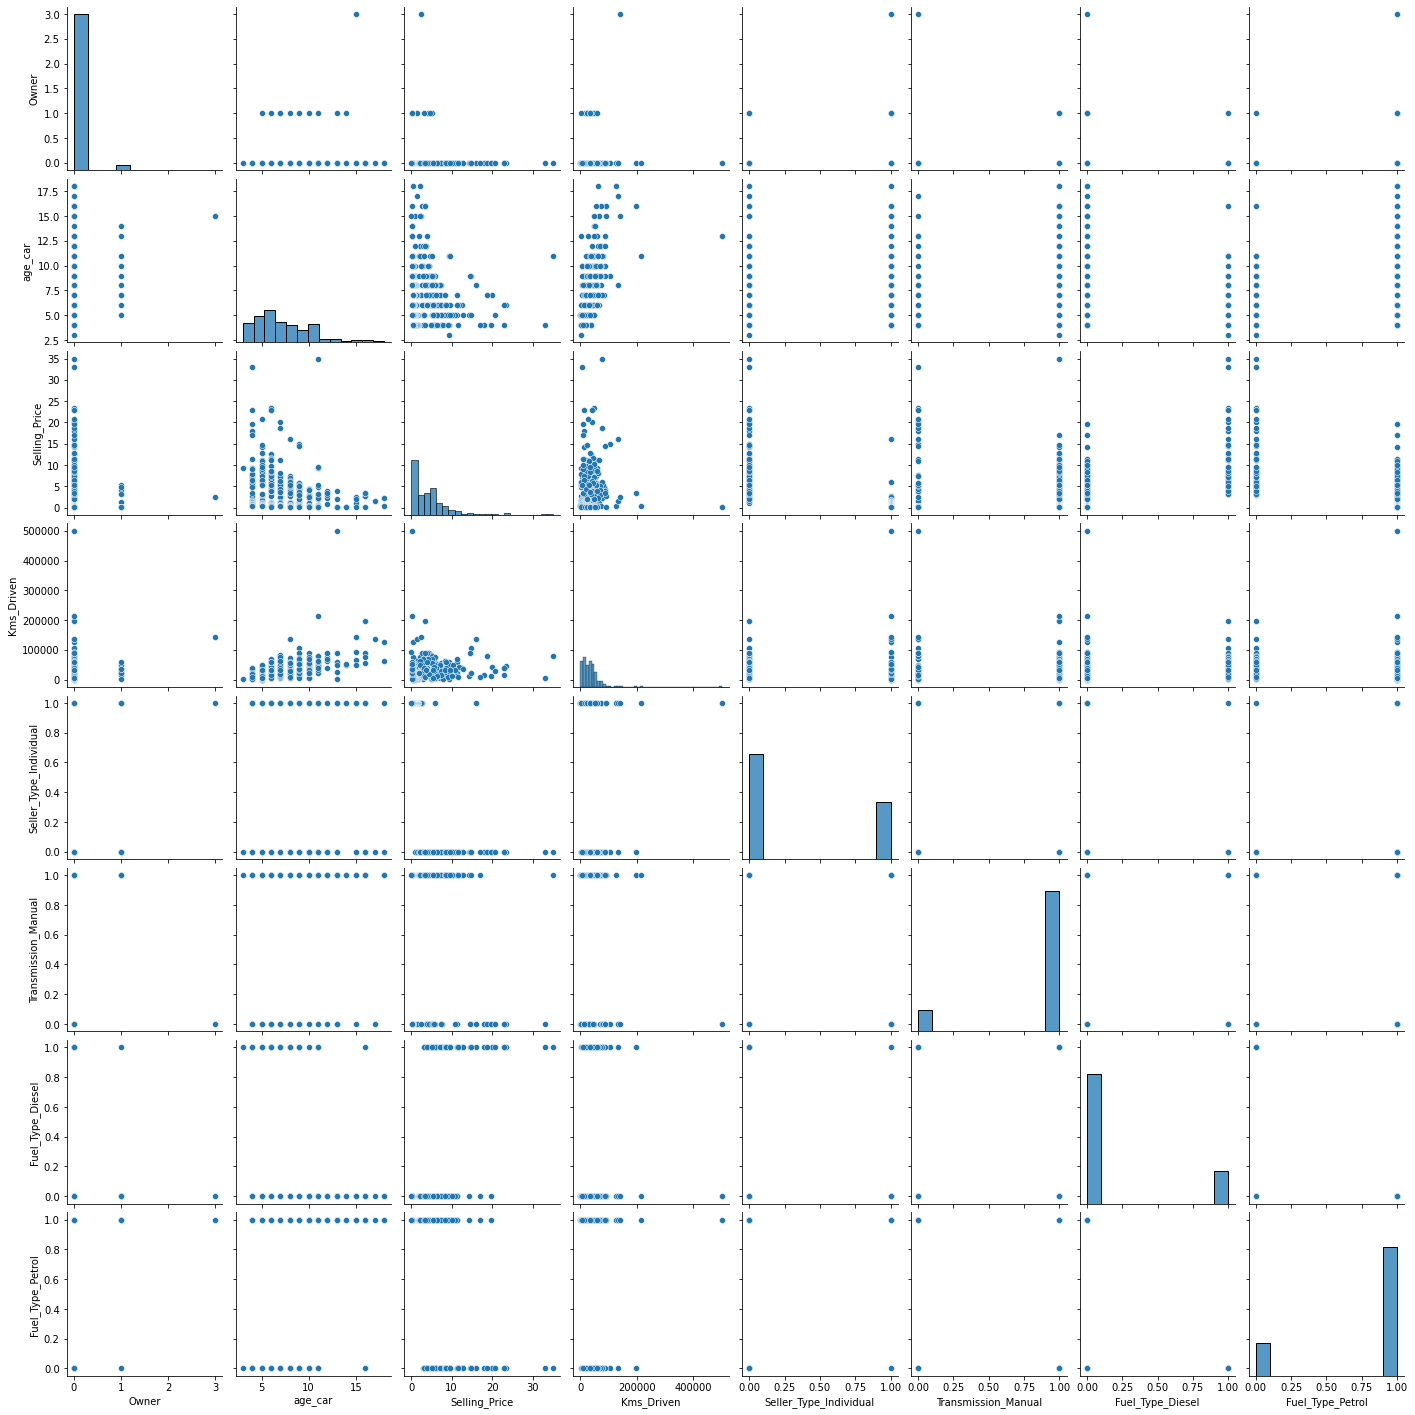

In [113]:
sns.pairplot(featur)

In [117]:
import matplotlib.pyplot as plt

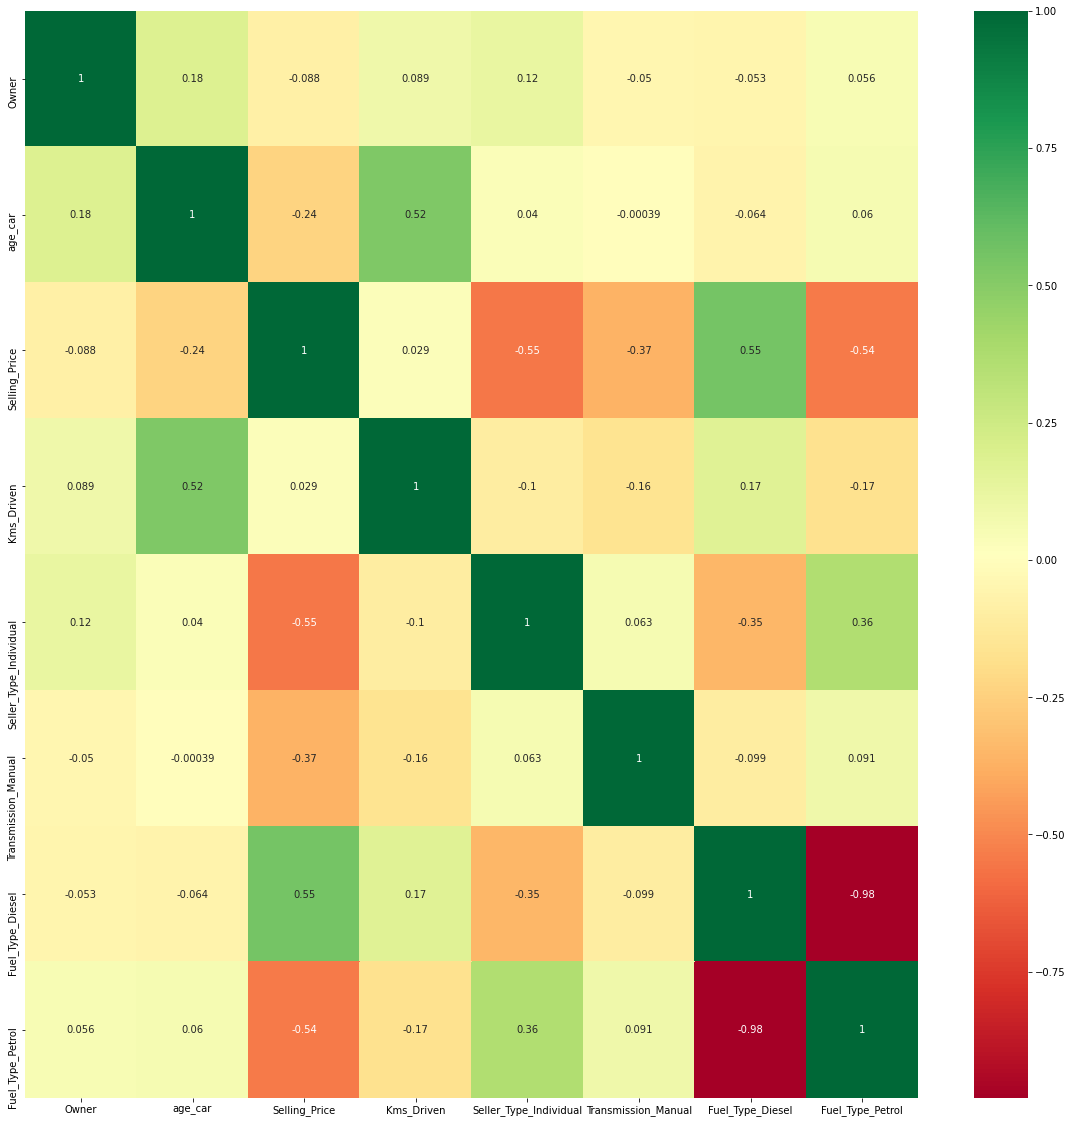

In [118]:
cor=featur.corr()
fig=cor.index
plt.figure(figsize=(20,20))
g=sns.heatmap(featur[fig].corr(),annot=True,cmap='RdYlGn')

In [119]:
X=featur.iloc[:,1:]
Y=featur.iloc[:,1]